# Business Case

FicZon Inc. is a company that sells IT solutions (like software) both through physical installations and online subscriptions. They get most of their potential customers (leads) from their website.

##### The Problem:
Sales at FicZon are dropping because of new competition. They think the quality of the leads they're getting might be an issue. Currently, salespeople manually categorize leads as high or low potential, but this happens after they've already contacted the lead.

##### The Goal:  
Analyze the data to see if it can help improve sales.  
Build a machine learning model that can predict whether a lead is high or low potential.

##### Business Benefits :
Improved lead prioritization: By automatically categorizing leads, sales teams can focus on the most promising prospects, increasing the likelihood of closing deals.
Increased sales efficiency: Reduced time spent on low-potential leads allows salespeople to spend more time nurturing and converting high-quality leads.
Enhanced customer experience: A more targeted approach to lead engagement can result in a better customer experience, as leads are more likely to receive relevant and timely information.
Data-driven decision making: The machine learning model can provide valuable insights into lead behavior and preferences, enabling data-driven decision making and continuous improvement.
Scalability: As the company grows and the volume of leads increases, the machine learning model can handle the increased workload without compromising accuracy.





# Domain Analysis

FicZon operates in the IT solutions industry, specializing in software sales through both physical installations and online subscriptions. The company's primary challenge is declining sales due to increased competition.

Lead Generation: FicZon relies heavily on its website to generate leads. Understanding the sources of these leads, such as search engines, social media, or referrals, is crucial for tailoring marketing efforts.  
Lead Qualification: The ability to accurately assess the potential of a lead is essential for efficient sales operations. Factors like the lead's industry, company size, and specific product interest can influence their likelihood of conversion.  
Sales Process: Analyzing the current sales process, including steps like initial contact, product demonstrations, and negotiation, can help identify areas for improvement through machine learning.  
Customer Behavior: Understanding how leads interact with FicZon's website, marketing materials, and sales representatives can provide valuable insights into their preferences and decision-making processes.

To address the challenges faced by FicZon, a machine learning-based solution can be implemented. By analyzing historical lead data, the model can learn to predict the likelihood of a lead converting into a customer. This predictive capability can be used to:

Prioritize leads: Sales teams can focus their efforts on high-potential leads, increasing efficiency and improving conversion rates.
Optimize sales processes: The model can identify bottlenecks in the sales pipeline and suggest improvements to streamline the process.
Personalize customer interactions: By understanding lead preferences, the model can help tailor marketing and sales communications to increase engagement and conversion.
Measure and improve performance: The model can provide insights into the effectiveness of different sales strategies and marketing campaigns, allowing for continuous optimization.




In [5]:
## Importing related libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import warnings 
warnings.filterwarnings('ignore')
# imported warning libraries to ignore the warnings 

In [7]:
df=pd.read_csv('client_dataset.csv')
df
# impored dataset in df 

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
995,12-10-2018 14:54,9.0,Call,916XXXXXXX,#VALUE!,Sales-Agent-9,Mumbai,Mode-1,Just Enquiry
996,12-10-2018 14:44,19.0,Website,982XXXXXXX,kXXXXXXX@gmail.com,Sales-Agent-11,Mumbai,Mode-3,Potential
997,12-10-2018 13:45,18.0,Call,974XXXXXXX,sXXXXXXXahoo.co.in,Sales-Agent-3,Chennai,Mode-1,Potential
998,12-10-2018 13:43,19.0,Call,740XXXXXXX,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-5,CONVERTED


In [8]:
# as we don't require column 'Created' , drop column
df.drop('Created',axis=1 , inplace=True)

# Basic Checks

In [10]:
df.head()

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [11]:
df.tail()

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
995,9.0,Call,916XXXXXXX,#VALUE!,Sales-Agent-9,Mumbai,Mode-1,Just Enquiry
996,19.0,Website,982XXXXXXX,kXXXXXXX@gmail.com,Sales-Agent-11,Mumbai,Mode-3,Potential
997,18.0,Call,974XXXXXXX,sXXXXXXXahoo.co.in,Sales-Agent-3,Chennai,Mode-1,Potential
998,19.0,Call,740XXXXXXX,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-5,CONVERTED
999,9.0,Call,955XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-3,Delhi,Mode-3,Potential


In [12]:
df.drop('Mobile',axis=1,inplace=True)
df.drop('EMAIL',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     965 non-null    float64
 1   Source         995 non-null    object 
 2   Sales_Agent    992 non-null    object 
 3   Location       966 non-null    object 
 4   Delivery_Mode  1000 non-null   object 
 5   Status         1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [14]:
df.describe()

,Product_ID
count,965.000000
mean,16.337824
std,5.768518
min,1.000000
25%,15.000000
50%,18.000000
75%,19.000000
max,27.000000


In [15]:
df.describe(include='O')

,Source,Sales_Agent,Location,Delivery_Mode,Status
count,995,992,966,1000,1000
unique,13,8,15,5,11
top,Call,Sales-Agent-9,Other Locations,Mode-1,In Progress Positive
freq,374,216,365,374,203


In [16]:
df.shape

(1000, 6)

In [17]:
# Dropping rows with missing data 
df.replace('',np.nan,inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
df.shape

(957, 6)

In [18]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
2,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive


In [19]:
df.columns

Index(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Status'],
      dtype='object')

In [20]:
df.Status.unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'LOST', 'Long Term', 'converted'], dtype=object)

In [21]:
df.Source.unique()

array(['Live Chat-Google Organic', 'Call', 'Website', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC'], dtype=object)

In [22]:
df.Sales_Agent.unique()

array(['Sales-Agent-3', 'Sales-Agent-4', 'Sales-Agent-11',
       'Sales-Agent-7', 'Sales-Agent-9', 'Sales-Agent-8', 'Sales-Agent-5'],
      dtype=object)

In [23]:
df.Location.unique()

array(['Bangalore', 'Other Locations', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'UAE', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE'], dtype=object)

In [24]:
df.Delivery_Mode.unique()

array(['Mode-1', 'Mode-5', 'Mode-3', 'Mode-2', 'Mode-4'], dtype=object)

In [25]:
df.Product_ID.value_counts()

Product_ID
18.0    254
15.0    196
19.0    163
9.0     117
27.0     95
5.0      50
25.0     17
20.0     16
10.0     15
12.0      9
2.0       7
1.0       7
3.0       3
13.0      3
11.0      2
21.0      1
24.0      1
26.0      1
Name: count, dtype: int64

In [26]:
df.Status.unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'LOST', 'Long Term', 'converted'], dtype=object)

In [27]:
# dividing the Status into high or low potential
df.Status.replace(['Not Responding','Junk Lead','In Progress Negative','Lost'],'High Potential',inplace=True)
df.Status.replace(['Potential','In Progress Positive','Just Enquiry','CONVERTED','Open','LOST','Long Term','converted'],'Low Potential' , inplace=True)

In [28]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Low Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Low Potential
2,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Low Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,High Potential
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,Low Potential


In [29]:
df.Status.value_counts()

Status
Low Potential     626
High Potential    331
Name: count, dtype: int64

# EDA

### Univarite Analysis

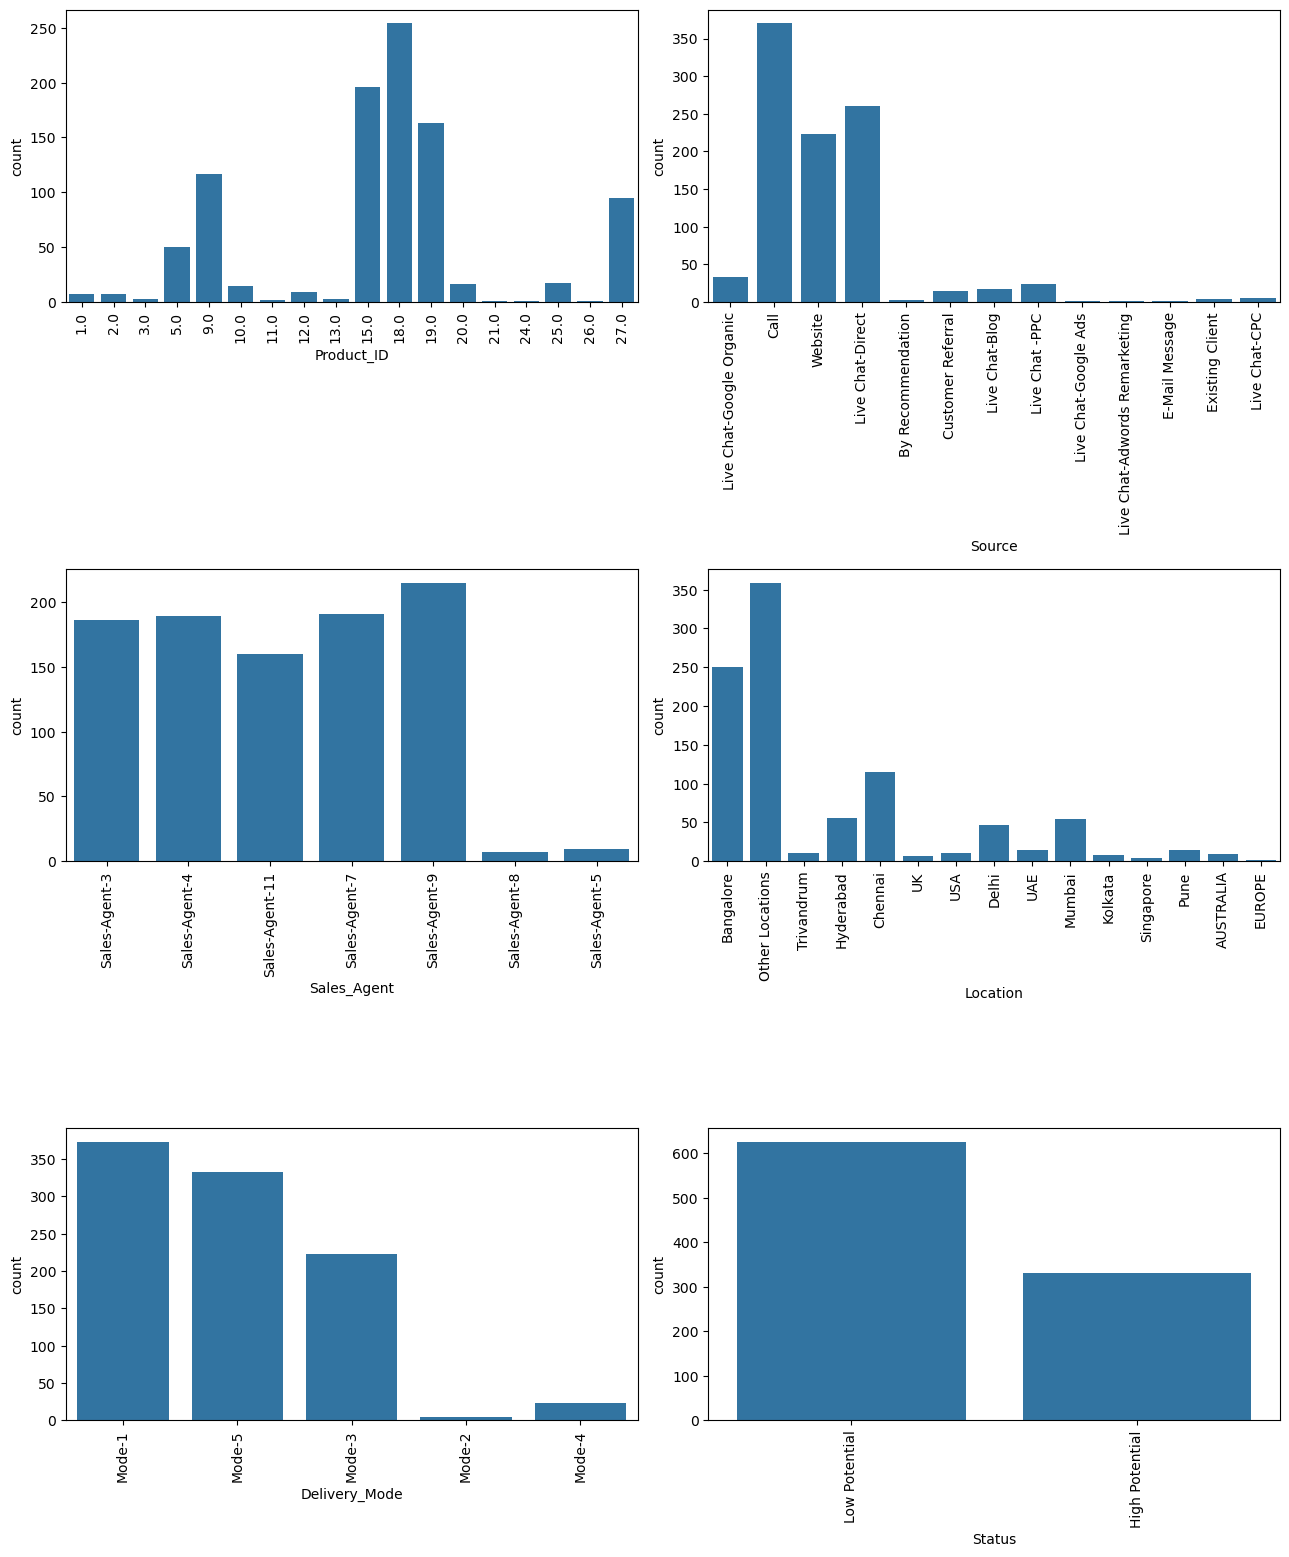

In [32]:
plt.figure(figsize=(13,20))
plotnumber=1
for i in df:
    plt.subplot(4,2,plotnumber)
    sns.countplot(x=df[i])
    plt.xticks(rotation=90)
    plotnumber=plotnumber+1
plt.tight_layout()

#### Insights :-

##### Product_Id :  
The distribution of Product_ID is skewed to the right, indicating that there are a few products with a significantly higher number of leads compared to others.Product IDs 18, 19, and 20 seem to be the most popular among leads.

##### Source :  
 The most common sources of leads are "Website" and "Live Chat-Google Organic."Call" and "Live Chat-Direct" also have a significant number of leads.Sources like "By Recommendation," "Customer Referral," and "E-Mail Message" have relatively fewer leads.

##### Sales Agent :
 Sales Agents 3, 4, and 11 appear to be the most active, handling a significantly higher number of leads than the others. Sales Agents 2, 5, and 9 seem to be less involved, with considerably fewer leads assigned.

##### Location :
Bangalore and other locations have the highest number of leads.There are noticeable differences in lead distribution across regions, with some locations having significantly fewer leads than others.

##### Delivery Mode :
 Mode 1 is the most preferred delivery mode among leads. Modes 2, 3, and 5 have a limited number of leads.

##### Status :
 A significant portion of leads are categorized as high potential. A smaller but noticeable number of leads are marked as lost. The remaining leads are classified as low potential.



### Bivarite Analysis

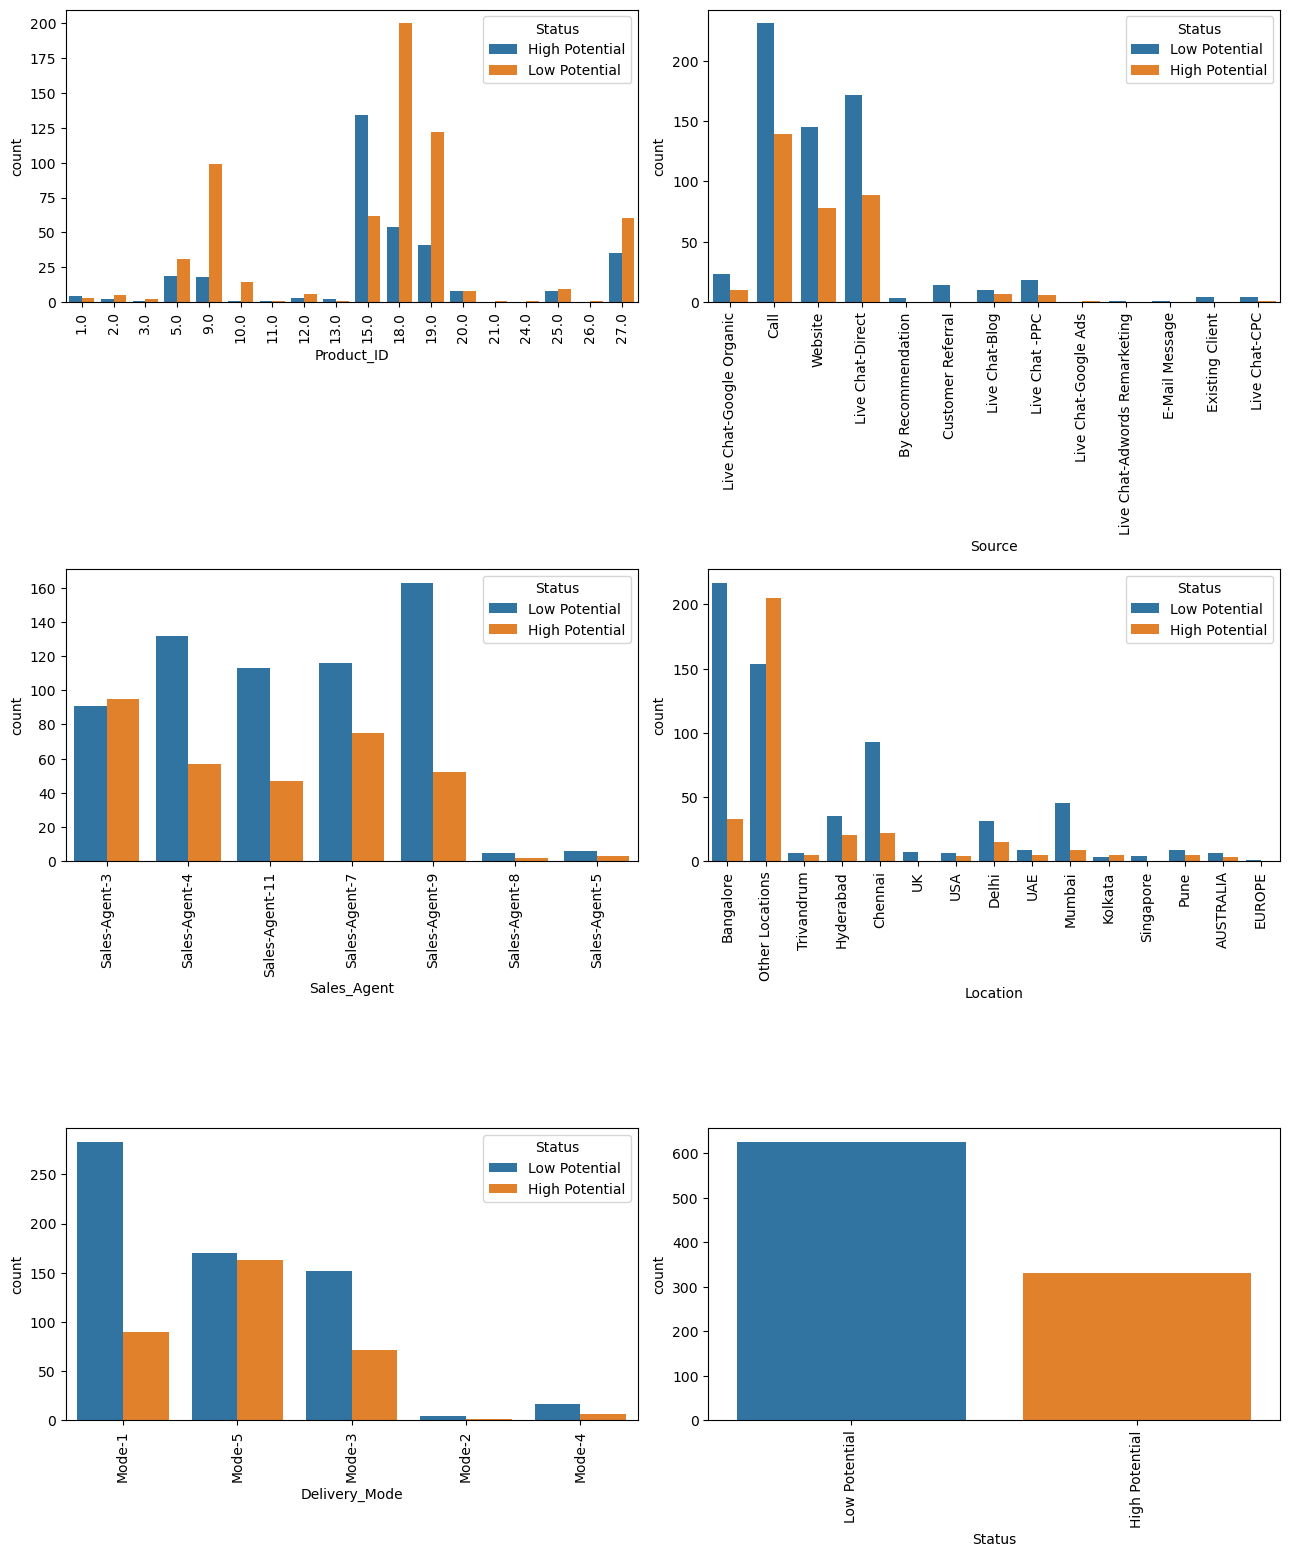

In [35]:
plt.figure(figsize=(13,20))
plotnumber=1
for i in df:
    plt.subplot(4,2,plotnumber)
    sns.countplot(x=df[i],hue=df.Status)
    plt.xticks(rotation=90)
    plotnumber=plotnumber+1
plt.tight_layout()

#### Insights :-

##### Product ID :
Some products appear to have a higher proportion of high-potential leads, while others might have a higher percentage of low-potential or lost leads.
Identifying products with consistently low conversion rates can help focus on product improvements or targeted marketing efforts.

##### Source :
Certain sources might be more effective in attracting high-potential leads, while others could be associated with a higher proportion of low-potential or lost leads.
Understanding these relationships can help optimize marketing efforts by allocating resources to the most effective channels.

##### Sales Agent :
Some sales agents might consistently convert a higher percentage of leads into customers, while others may struggle to close deals.
Identifying underperforming agents can help tailor training programs or provide additional support to improve their performance.

##### Location :
Regional Variations: Certain regions might have a higher proportion of high-potential leads or lower conversion rates.
Targeted Marketing: Understanding these variations can help tailor marketing efforts to specific regions.

##### Delivery Mode :
Mode 1 is the most popular delivery mode across all lead statuses.
While Mode 1 is dominant, there might be slight variations in the distribution of statuses within each delivery mode. For instance, Mode 1 might have a higher proportion of high-potential leads compared to other modes.


# Data Preprocesing 

### Checking for null values 

In [39]:
df.isnull().sum()                # No Null Values

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

### Handling Outlires 

<Axes: xlabel='Product_ID'>

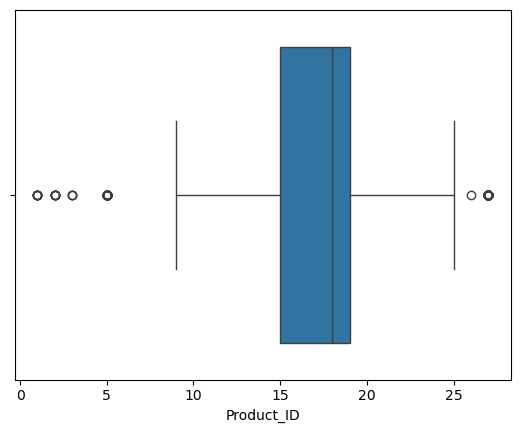

In [41]:
# Only one numeric column so check for it 
sns.boxplot(x=df.Product_ID )

In [42]:
df.loc[df.Product_ID > 25 ,'Product_ID']

6      27.0
10     27.0
36     27.0
46     27.0
74     27.0
       ... 
920    27.0
935    27.0
938    27.0
946    26.0
949    27.0
Name: Product_ID, Length: 96, dtype: float64

In [43]:
df.loc[df.Product_ID < 10 ,'Product_ID']

0      9.0
11     9.0
12     9.0
13     9.0
16     5.0
      ... 
937    5.0
939    9.0
951    9.0
952    9.0
956    9.0
Name: Product_ID, Length: 184, dtype: float64

In [44]:
df.loc[df.Product_ID > 25 ,'Product_ID']=np.median(df.Product_ID.dropna())

In [45]:
df.loc[df.Product_ID  < 10 ,'Product_ID']=np.median(df.Product_ID.dropna())

### Encoding 

In [47]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [48]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Low Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Low Potential
2,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Low Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,High Potential
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,Low Potential


In [49]:
df.Product_ID=LE.fit_transform(df.Product_ID)
df.Source=LE.fit_transform(df.Source)
df.Sales_Agent=LE.fit_transform(df.Sales_Agent)
df.Location=LE.fit_transform(df.Location)
df.Delivery_Mode=LE.fit_transform(df.Delivery_Mode)
df.Status=LE.fit_transform(df.Status)




In [50]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,5,11,1,1,0,1
1,6,1,2,8,4,1
2,5,12,0,11,0,1
3,4,12,4,5,0,0
4,5,1,4,1,0,1


### Scaling 

In [52]:
from sklearn.preprocessing import MinMaxScaler
MS=MinMaxScaler()

In [53]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,5,11,1,1,0,1
1,6,1,2,8,4,1
2,5,12,0,11,0,1
3,4,12,4,5,0,0
4,5,1,4,1,0,1


In [54]:
df.Product_ID=MS.fit_transform(df[['Product_ID']])
df.Source=MS.fit_transform(df[['Source']])
df.Sales_Agent=MS.fit_transform(df[['Sales_Agent']])
df.Location=MS.fit_transform(df[['Location']])
df.Delivery_Mode=MS.fit_transform(df[['Delivery_Mode']])
df.Status=MS.fit_transform(df[['Status']])





In [55]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0.5,0.916667,0.166667,0.071429,0.0,1.0
1,0.6,0.083333,0.333333,0.571429,1.0,1.0
2,0.5,1.000000,0.000000,0.785714,0.0,1.0
3,0.4,1.000000,0.666667,0.357143,0.0,0.0
4,0.5,0.083333,0.666667,0.071429,0.0,1.0


# Feature Selection

In [57]:
df.drop('Product_ID',axis=1).corr()

,Source,Sales_Agent,Location,Delivery_Mode,Status
Source,1.000000,0.000254,0.041466,-0.287185,0.012654
Sales_Agent,0.000254,1.000000,-0.061768,-0.154209,0.088186
Location,0.041466,-0.061768,1.000000,0.450492,-0.305243
Delivery_Mode,-0.287185,-0.154209,0.450492,1.000000,-0.219601
Status,0.012654,0.088186,-0.305243,-0.219601,1.000000


<Axes: >

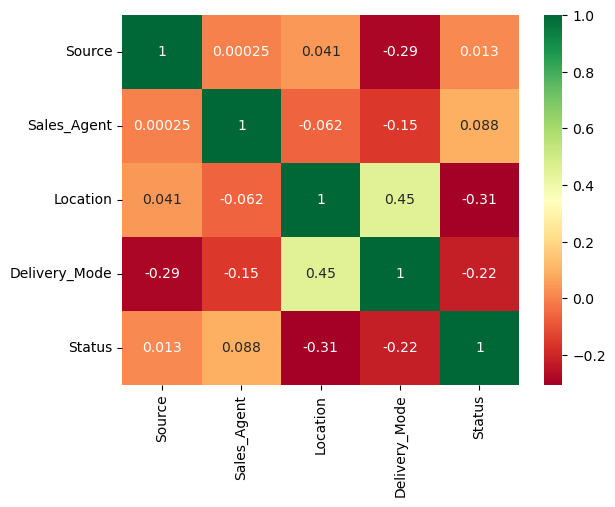

In [58]:
sns.heatmap(df.drop('Product_ID',axis=1).corr(),annot=True,cmap='RdYlGn')


### Spliting the Data Into Training And Testing 

In [60]:
x=df.drop('Status',axis=1)
x

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,0.5,0.916667,0.166667,0.071429,0.0
1,0.6,0.083333,0.333333,0.571429,1.0
2,0.5,1.000000,0.000000,0.785714,0.0
3,0.4,1.000000,0.666667,0.357143,0.0
4,0.5,0.083333,0.666667,0.071429,0.0
...,...,...,...,...,...
952,0.5,0.083333,1.000000,0.500000,0.0
953,0.6,1.000000,0.000000,0.500000,0.5
954,0.5,0.083333,0.166667,0.142857,0.0
955,0.6,0.083333,0.000000,0.071429,1.0


In [61]:
y=df.Status
y

0      1.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
952    1.0
953    1.0
954    1.0
955    1.0
956    1.0
Name: Status, Length: 957, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [64]:
x_train

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
357,0.5,0.083333,1.000000,0.142857,0.0
29,0.4,0.083333,0.000000,0.571429,1.0
55,0.4,0.083333,0.333333,0.571429,1.0
481,0.6,1.000000,0.666667,0.571429,0.0
331,0.5,1.000000,0.666667,0.571429,0.0
...,...,...,...,...,...
106,0.5,0.416667,0.000000,0.071429,0.0
270,0.5,1.000000,0.666667,0.571429,1.0
860,0.5,0.416667,0.000000,0.142857,0.0
435,0.5,0.750000,1.000000,0.071429,0.5


In [65]:
y_train

357    1.0
29     1.0
55     1.0
481    0.0
331    1.0
      ... 
106    1.0
270    1.0
860    1.0
435    1.0
102    1.0
Name: Status, Length: 717, dtype: float64

### Balancing the data

In [67]:
y.value_counts()

Status
1.0    626
0.0    331
Name: count, dtype: int64

##### the percentages of 1s (65.45%) and 0s (34.55%) , so the data is considered as balanced

# Model Training 

# Applying for Logistic regression

In [1028]:
from sklearn.linear_model import LogisticRegression
Log=LogisticRegression(random_state=42)

In [1029]:
Log.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [1030]:
yP_log=Log.predict(x_test)
yP_log

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [1031]:
y_test.values

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0.

# Model Evaluation for Logistic regression

In [1033]:
from sklearn.metrics import accuracy_score , recall_score, f1_score , confusion_matrix

In [1034]:
accuracy_score(y_test,yP_log)

0.7041666666666667

In [1035]:
recall_score(y_test,yP_log)

0.8475609756097561

In [1036]:
f1_score(y_test,yP_log)

0.7965616045845272

In [1037]:
confusion_matrix(y_test,yP_log)

array([[ 30,  46],
       [ 25, 139]], dtype=int64)

# Hyperparameter tuning for logistic regression

In [1039]:
from sklearn.model_selection import GridSearchCV

# Imports the GridSearchCV class, which performs an exhaustive search over a specified parameter grid to find the optimal hyperparameters 

In [1040]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

###### The param_grid defines a grid of hyperparameters for GridSearchCV to explore for tuning a logistic regression model, including different penalties (l1, l2, etc.), regularization strengths (C values on a log scale), solvers, and iteration limits. This setup helps find the optimal combination of these parameters.

In [1042]:
grid=GridSearchCV(LogisticRegression(random_state=42),param_grid,scoring='f1',verbose=3,cv=2)
grid
# Initializes a grid search to find the best hyperparameters for a logistic regression model 

GridSearchCV(cv=2, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='f1', verbose=3)

In [ ]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 1600 candidates, totalling 3200 fits
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=saga;, score=0.784 total 

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
hyp_log=LogisticRegression(C=0.0001,max_iter=5000, random_state=42, solver='saga')

# initializes a logistic regression model with a specific regularization strength, maximum iterations, random state for 
# reproducibility, and the 'sag' solver


In [ ]:
hyp_log.fit(x_train,y_train)

In [ ]:
y_hyp_log=hyp_log.predict(x_test)
y_hyp_log

In [ ]:
accuracy_score(y_test,y_hyp_log)

In [ ]:
recall_score(y_test,y_hyp_log)

In [ ]:
f1_score(y_test,y_hyp_log)

In [ ]:
confusion_matrix(y_test,y_hyp_log)

# Applying for KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

In [ ]:
Error=[]
for i in range (1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_predict1=knn.predict(x_test)
    error=(y_test !=y_predict1).sum()/len(y_test)*100
    Error.append(error)

# The code snippet calculates and appends the classification error percentage for a k-nearest neighbors model
# with varying n_neighbors values from 1 to 9, storing the results in the Error list.
    

In [ ]:
Error

In [ ]:
plt.plot(range(1,11),Error,marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=5)
#  initializes a k-nearest neighbors classifier with 5 neighbors.

In [ ]:
KNN.fit(x_train,y_train)

In [ ]:
yP_KNN=KNN.predict(x_test)
yP_KNN

In [ ]:
y_test.values

# Model Evaluation for KNN

In [ ]:
from sklearn.metrics import accuracy_score , recall_score , f1_score , confusion_matrix

In [ ]:
accuracy_score(y_test,yP_KNN)

In [ ]:
recall_score(y_test,yP_KNN)

In [ ]:
f1_score(y_test,yP_KNN)

In [ ]:
confusion_matrix(y_test,yP_KNN)

# Hyperparameter Tuning for KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [7],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

#grid_params dictionary specifies a grid of hyperparameters for tuning a k-nearest neighbors classifier, 
#including n_neighbors, weights, and metric options

In [ ]:
grid_knn=GridSearchCV(KNeighborsClassifier(), grid_params ,scoring='f1', verbose=3, cv=4 )
grid_knn

# initializes a grid search to optimize k-nearest neighbors hyperparameters using the specified parameter grid,
# aiming to maximize the F1 score with 4-fold cross-validation and detailed logging

In [ ]:
 grid_knn.fit(x_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
hyp=LogisticRegression(C=0.0001, penalty='l1', random_state=42, solver='saga')


In [ ]:
hyp.fit(x_train,y_train)

In [ ]:
y_hyp_predict=hyp.predict(x_test)
y_hyp_predict

In [ ]:
y_test.values

In [ ]:
accuracy_score(y_test,y_hyp_predict)

In [ ]:
recall_score(y_test,y_hyp_predict)

In [ ]:
f1_score(y_test,y_hyp_predict)

In [ ]:
confusion_matrix(y_test,y_hyp_predict)

# Applying for SVM 

In [ ]:
from sklearn.svm import SVC
SV=SVC()
#initializes a support vector classifier with default parameters.

In [ ]:
SV.fit(x_train,y_train)   # Fitting the training data

In [ ]:
y_predict_SV=SV.predict(x_test)
y_predict_SV   
# predicting the x_test

In [ ]:
y_test.values

# Model Evaluation for SVM 

In [ ]:
from sklearn.metrics import accuracy_score , recall_score , f1_score , confusion_matrix

In [ ]:
accuracy_score(y_test,y_predict_SV)

In [ ]:
recall_score(y_test,y_predict_SV)

In [ ]:
f1_score(y_test,y_predict_SV)

In [ ]:
confusion_matrix(y_test,y_predict_SV)

# Hyperparameter Tuning For SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_SV = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
# defines a grid of hyperparameters for tuning a support vector classifier, specifying different values for the regularization
# parameter C and the kernel coefficient gamma.

In [ ]:
grid_SV = GridSearchCV(SV, param_grid_SV, scoring='f1', cv = 5, verbose = 3)
grid_SV
# initializes a grid search to find the best hyperparameters

In [ ]:
grid_SV.fit(x_train, y_train)

In [ ]:
grid_SV.best_params_  
# retrieves the best hyperparameters found by the grid search for the support vector classifier.

In [ ]:
grid_SV.best_estimator_
# returns the support vector classifier with the best hyperparameters found by the grid search.

In [ ]:
clf_SV=SVC(C=1, gamma=1)
#  initializes a support vector classifier with a regularization parameter C of 1000 and a kernel coefficient gamma of 0.0001.

In [ ]:
clf_SV.fit(x_train,y_train)

In [ ]:
y_hyp_SV=clf_SV.predict(x_test)
y_hyp_SV

In [ ]:
accuracy_score(y_test,y_hyp_SV)

In [ ]:
recall_score(y_test,y_hyp_SV)

In [ ]:
f1_score(y_test,y_hyp_SV)

In [ ]:
confusion_matrix(y_test,y_hyp_SV)

# Applying for Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier(random_state=42)#object creation for decision tree  


In [ ]:
dt.fit(x_train,y_train)#training the model


In [ ]:
y_hat=dt.predict(x_test)#prediction
y_hat

In [ ]:
accuracy_score(y_test,y_hat)

In [ ]:
recall_score(y_test,y_hat)

In [ ]:
f1_score(y_test,y_hat)

In [ ]:
confusion_matrix(y_test,y_hat)

# Hyperparameter Tuning For Decision Tree 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
list(range(1, 20))

In [ ]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20))
}

#  parameter grid for tuning a decision tree classifier with various options for criteria, split methods, maximum depth, 
# and minimum samples for splitting and leaf nodes.

In [ ]:
dt1 = DecisionTreeClassifier(random_state=42)

In [ ]:
grid = GridSearchCV(dt1, params, scoring='f1', cv = 3, verbose = 3, n_jobs=-1)

# initializes a grid search to optimize the decision tree classifier dt1 using the specified parameter grid,
# optimizing for the F1 score with 5-fold cross-validation, detailed logging, and parallel processing.

In [ ]:
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
dt2 = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 6,
 min_samples_leaf= 17,
 min_samples_split= 2,
 splitter= 'best', random_state=42)

# initializes a decision tree classifier with specific hyperparameters for criterion, maximum depth, minimum samples per 
# leaf and split, and splitter method.


In [ ]:
dt2.fit(x_train, y_train)

In [ ]:
y_train_pred1 = dt2.predict(x_train)
y_train_pred1

In [ ]:
y_test.values

In [ ]:
accuracy_score(y_train, y_train_pred1)

In [ ]:
recall_score(y_train, y_train_pred1)

In [ ]:
f1_score(y_train, y_train_pred1)

In [ ]:
confusion_matrix(y_train, y_train_pred1)

# Applying for Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)

In [128]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [129]:
yp_test=RF.predict(x_test)
yp_test

array([0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1.

In [131]:
yp_train=RF.predict(x_train)
yp_train 

array([1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1.

# Model Evaluation 

In [135]:
from sklearn.metrics import accuracy_score , precision_score ,f1_score , recall_score, confusion_matrix

In [137]:
accuracy_score(y_test,yp_test)

0.7291666666666666

In [139]:
recall_score(y_test,yp_test)

0.7804878048780488

In [141]:
f1_score(y_test,yp_test)

0.7975077881619937

In [143]:
confusion_matrix(y_test,yp_test)

array([[ 47,  29],
       [ 36, 128]], dtype=int64)

# Hyperparameter tunning for Random Forest

In [147]:
from sklearn.model_selection import RandomizedSearchCV

In [149]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [151]:
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [153]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 

In [155]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [157]:
rfc = RandomForestClassifier(random_state=42)

In [159]:
rscv = RandomizedSearchCV(estimator=rfc, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [161]:
rscv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [162]:
rscv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [163]:
rf2 = RandomForestClassifier(n_estimators = 1400,
 min_samples_split = 5,
 min_samples_leaf = 4,
 max_features = 'sqrt',random_state=42,
 max_depth = 10,
 bootstrap = True)

In [164]:
rf2.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1400, random_state=42)

In [165]:
y_pred3 = rf2.predict(x_test)
y_pred3_train = rf2.predict(x_train)

In [166]:
y_pred3

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1.

In [167]:
y_pred3_train

array([1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1.

In [168]:
accuracy_score(y_test,y_pred3)

0.7541666666666667

In [169]:
recall_score(y_test,y_pred3)

0.8658536585365854

In [170]:
f1_score(y_test,y_pred3)

0.8279883381924198

In [171]:
confusion_matrix(y_test,y_pred3)

array([[ 39,  37],
       [ 22, 142]], dtype=int64)

# Applying for Navie Bayes

In [183]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()

In [185]:
NB.fit(x_train,y_train)

MultinomialNB()

In [187]:
y_predict_NB=NB.predict(x_test)
y_predict_NB

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [188]:
y_test.values

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0.

# Model Evaluation

In [193]:
from sklearn.metrics import accuracy_score , recall_score , f1_score, confusion_matrix

In [195]:
accuracy_score(y_test,y_predict_NB)

0.6833333333333333

In [197]:
recall_score(y_test,y_predict_NB)

1.0

In [199]:
f1_score(y_test,y_predict_NB)

0.8118811881188119

In [201]:
confusion_matrix(y_test,y_predict_NB)

array([[  0,  76],
       [  0, 164]], dtype=int64)

# Applying for Gradient Boosting

In [206]:
from sklearn.ensemble import GradientBoostingClassifier
GBM=GradientBoostingClassifier(random_state=42)

In [208]:
GBM.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [209]:
y_gbm=GBM.predict(x_test)
y_gbm

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1.

In [210]:
y_test.values

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0.

# Model Evaluation

In [216]:
from sklearn.metrics import accuracy_score,recall_score,f1_score , confusion_matrix

In [217]:
accuracy_score(y_test,y_gbm)

0.7625

In [220]:
recall_score(y_test,y_gbm)

0.8414634146341463

In [221]:
f1_score(y_test,y_gbm)

0.8288288288288288

In [224]:
confusion_matrix(y_test,y_gbm)

array([[ 45,  31],
       [ 26, 138]], dtype=int64)

# Applying for XGBoost

In [229]:
## Installing XGB library
# !pip3 install xgboost

In [230]:
import xgboost 

In [231]:
## model creation
from xgboost import XGBClassifier
xgb_r=XGBClassifier() 
xgb_r.fit(x_train,y_train)              ## fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [232]:
y_hat = xgb_r.predict(x_test)
y_hat

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [233]:
y_test.values

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0.

# Model Evaluation 

In [241]:
from sklearn.metrics import accuracy_score , recall_score , f1_score , confusion_matrix

In [243]:
accuracy_score(y_test,y_hat)

0.7333333333333333

In [245]:
recall_score(y_test,y_hat)

0.7926829268292683

In [247]:
f1_score(y_test,y_hat)

0.8024691358024691

In [249]:
confusion_matrix(y_test,y_hat)

array([[ 46,  30],
       [ 34, 130]], dtype=int64)

# Hyperparameter Tuning for XGBoost

In [253]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [255]:
XGB = XGBClassifier(random_state=42, verbosity=0, silent=0)

In [257]:
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [259]:
rcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=42, scoring='f1', verbose=2)

In [260]:
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Best paramters: {'reg_lambda': 0.4, 'reg_alpha': 0.1, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.7, 'gamma': 12.8})


In [261]:
XGB2 = XGBClassifier(reg_lambda= 0.4, reg_alpha= 0.1, n_estimators=50, max_depth= 10, learning_rate=0.7, gamma=12.8)

In [262]:
XGB2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=12.8, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [263]:
y_predict=XGB2.predict(x_test)

In [264]:
y_predict_train = XGB2.predict(x_train)

In [269]:
accuracy_score(y_test,y_predict)

0.7541666666666667

In [274]:
recall_score(y_test,y_predict)

0.8902439024390244

In [276]:
f1_score(y_test,y_predict)

0.8319088319088319

In [278]:
confusion_matrix(y_test,y_predict)

array([[ 35,  41],
       [ 18, 146]], dtype=int64)

# Applying For ANN

In [283]:
## Scaling the data as the magnitude of variables are varying lot
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
scaled_x=sc.fit_transform(x) ## transforming the data

In [284]:
x = pd.DataFrame(scaled_x, columns=x.columns) ##converting the arrays
## to dataframe

In [285]:
x

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,0.021815,0.993397,-0.831305,-1.180049,-1.121802
1,0.856887,-1.154064,-0.369576,0.834514,1.196912
2,0.021815,1.208143,-1.293034,1.697899,-1.121802
3,-0.813257,1.208143,0.553882,-0.028870,-1.121802
4,0.021815,-1.154064,0.553882,-1.180049,-1.121802
...,...,...,...,...,...
952,0.021815,-1.154064,1.477339,0.546720,-1.121802
953,0.856887,1.208143,-1.293034,0.546720,0.037555
954,0.021815,-1.154064,-0.831305,-0.892254,-1.121802
955,0.856887,-1.154064,-1.293034,-1.180049,1.196912


In [286]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                test_size=0.2,random_state=10)

In [287]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.01,
                       max_iter=200,
                       random_state=42) ## model object creation max_iter=Stopping parameter
model.fit(x_train,y_train) ## training the data

MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.01,
              random_state=42)

In [288]:
y_predict_proba = model.predict_proba(x_test) ## predicting the probability of class
y_predict_proba

array([[4.42263823e-01, 5.57736177e-01],
       [7.47130934e-01, 2.52869066e-01],
       [2.22710718e-01, 7.77289282e-01],
       [2.53541616e-01, 7.46458384e-01],
       [7.47130934e-01, 2.52869066e-01],
       [1.04092874e-01, 8.95907126e-01],
       [1.45699606e-01, 8.54300394e-01],
       [2.84778249e-01, 7.15221751e-01],
       [7.47130934e-01, 2.52869066e-01],
       [5.41412238e-06, 9.99994586e-01],
       [2.90261160e-03, 9.97097388e-01],
       [7.47130934e-01, 2.52869066e-01],
       [1.35778898e-02, 9.86422110e-01],
       [5.98428112e-01, 4.01571888e-01],
       [2.53934969e-01, 7.46065031e-01],
       [3.01739378e-01, 6.98260622e-01],
       [6.69889001e-01, 3.30110999e-01],
       [2.31559875e-01, 7.68440125e-01],
       [4.04536041e-01, 5.95463959e-01],
       [2.11338381e-03, 9.97886616e-01],
       [7.07309137e-02, 9.29269086e-01],
       [7.47130934e-01, 2.52869066e-01],
       [1.16485977e-01, 8.83514023e-01],
       [1.01266525e-04, 9.99898733e-01],
       [1.598711

In [289]:
y_predict_ann = model.predict(x_test)
y_predict_ann

array([1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1.])

In [291]:
from sklearn.metrics import f1_score ,recall_score , accuracy_score ,classification_report


In [292]:
accuracy_score(y_test,y_predict_ann)

0.6770833333333334

In [293]:
recall_score(y_test,y_predict_ann)

0.765625

In [294]:
f1_score(y_test,y_predict_ann)

0.7596899224806202

In [295]:
confusion_matrix(y_test,y_predict_ann)

array([[32, 32],
       [30, 98]], dtype=int64)

# Conclusion

#### Understanding the Metrics :

F1-score: A harmonic mean of precision and recall, providing a balanced measure of accuracy.
Recall: Measures the proportion of true positives out of all actual positives.
Comparing Model Performance

#### Comparing Model Performance: 

Algorithm &emsp; &emsp; &emsp; &emsp; &emsp;	F1-score&emsp;&emsp; Recall-score   
Logistic Regression&emsp; &emsp;&emsp;	0.8118&emsp; &emsp;&emsp;&emsp;	1.0  
KNN&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;0.8118&emsp;&emsp; &emsp; &emsp;1.0   
SVM&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;0.8324&emsp;&emsp; &emsp; &emsp;0.9085  
Decision Tree &emsp;&emsp; &emsp; &emsp; &emsp;0.8049&emsp;&emsp; &emsp; &emsp;0.8398  
Random Forest &emsp; &emsp; &emsp; &emsp;	0.8279&emsp;&emsp; &emsp; &emsp;0.8658  
Naive Bayes &emsp; &emsp; &emsp; &emsp; &emsp; 0.8118&emsp;&emsp; &emsp; &emsp;	1.0  
Gradient Boosting &emsp; &emsp; &emsp; 0.8288&emsp;&emsp; &emsp; &emsp;0.8414  
XGBoost &emsp; &emsp; &emsp;&emsp; &emsp; &emsp;&emsp;0.8319&emsp;&emsp; &emsp; &emsp;0.8902  
ANN &emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;0.7596&emsp;&emsp; &emsp; &emsp;0.7656  


#### Best-Fitting Model :

Considering both F1-score and recall score, SVM appears to be the best-fitting model among the evaluated algorithms. It achieves a high F1-score and a relatively high recall score, indicating a good balance between precision and recall.

#### Comparison Report :

High-Performing Models: SVM, XGBoost, and Random Forest consistently demonstrate strong performance, suggesting their effectiveness in handling the given task.
Recall-Focused Models: Logistic Regression, KNN, and Naive Bayes achieve perfect recall, indicating their ability to identify all positive cases. However, their F1-scores are slightly lower, suggesting potential trade-offs in precision.
Decision Tree and ANN: While these models perform reasonably well, their F1-scores and recall scores are slightly lower than the top-performing models.

#### Conclusion :
Based on the provided data, SVM emerges as the preferred model for the task. Its ability to achieve a high F1-score while maintaining a relatively high recall score makes it a suitable choice. However, it's essential to consider other factors such as interpretability, computational efficiency, and the specific requirements of the application when making a final decision

## Challanges Faced 

#### Data Quality and Quantity:

Missing or Inconsistent Data:  
Incomplete or inaccurate data can significantly impact the model's performance. This can arise from various sources, such as data entry errors, system failures, or changes in data collection processes.

Data Bias:   
Biased data can lead to biased predictions. For example, if the training data is not representative of the entire population of leads, the model may struggle to generalize to new, unseen data.

Insufficient Data:   
A lack of sufficient data can hinder the model's ability to learn complex patterns and relationships. This is particularly problematic for rare or niche products or services.

#### Feature Engineering:

Selecting Relevant Features:   
Identifying the most informative features from a potentially large dataset can be challenging. Irrelevant or redundant features can introduce noise and reduce the model's accuracy.

Handling Categorical Variables:  
Converting categorical variables into a numerical format suitable for machine learning algorithms can be complex, especially for variables with many categories.

Feature Interactions:   
Understanding how features interact with each other can be difficult, but it is crucial for building accurate models. Capturing these interactions often requires domain knowledge and feature engineering techniques.
Model Complexity and Overfitting:

Overfitting:  
Models that are too complex can overfit the training data, leading to poor performance on new, unseen data. This can be particularly problematic when dealing with limited data.
Underfitting:  
Models that are too simple may not be able to capture the underlying patterns in the data, resulting in poor performance. Finding the right balance between model complexity and simplicity is essential.Interpretability:

Black Box Models:  
Some machine learning algorithms, such as deep neural networks, can be difficult to interpret. This can make it challenging to understand how the model is making predictions and identify potential biases.   

Explainable AI:  
Developing techniques to make complex models more interpretable is an ongoing area of research. This can help build trust in the model and facilitate decision-making.

#### Dynamic Environments:

Evolving Business Conditions:
The business landscape is constantly changing, and models may need to be updated to adapt to new trends or challenges.

Addressing these challenges requires careful data preparation, feature engineering, model selection, and ongoing monitoring. By overcoming these obstacles, FicZon can develop a robust and effective machine learning model to improve lead qualification and drive business growth.